<a href="https://colab.research.google.com/github/Siriprapa-tewee/229351/blob/main/Copy_of_Lab05_decision_tree_bagging_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [19]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [4]:

# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [5]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [6]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=9)

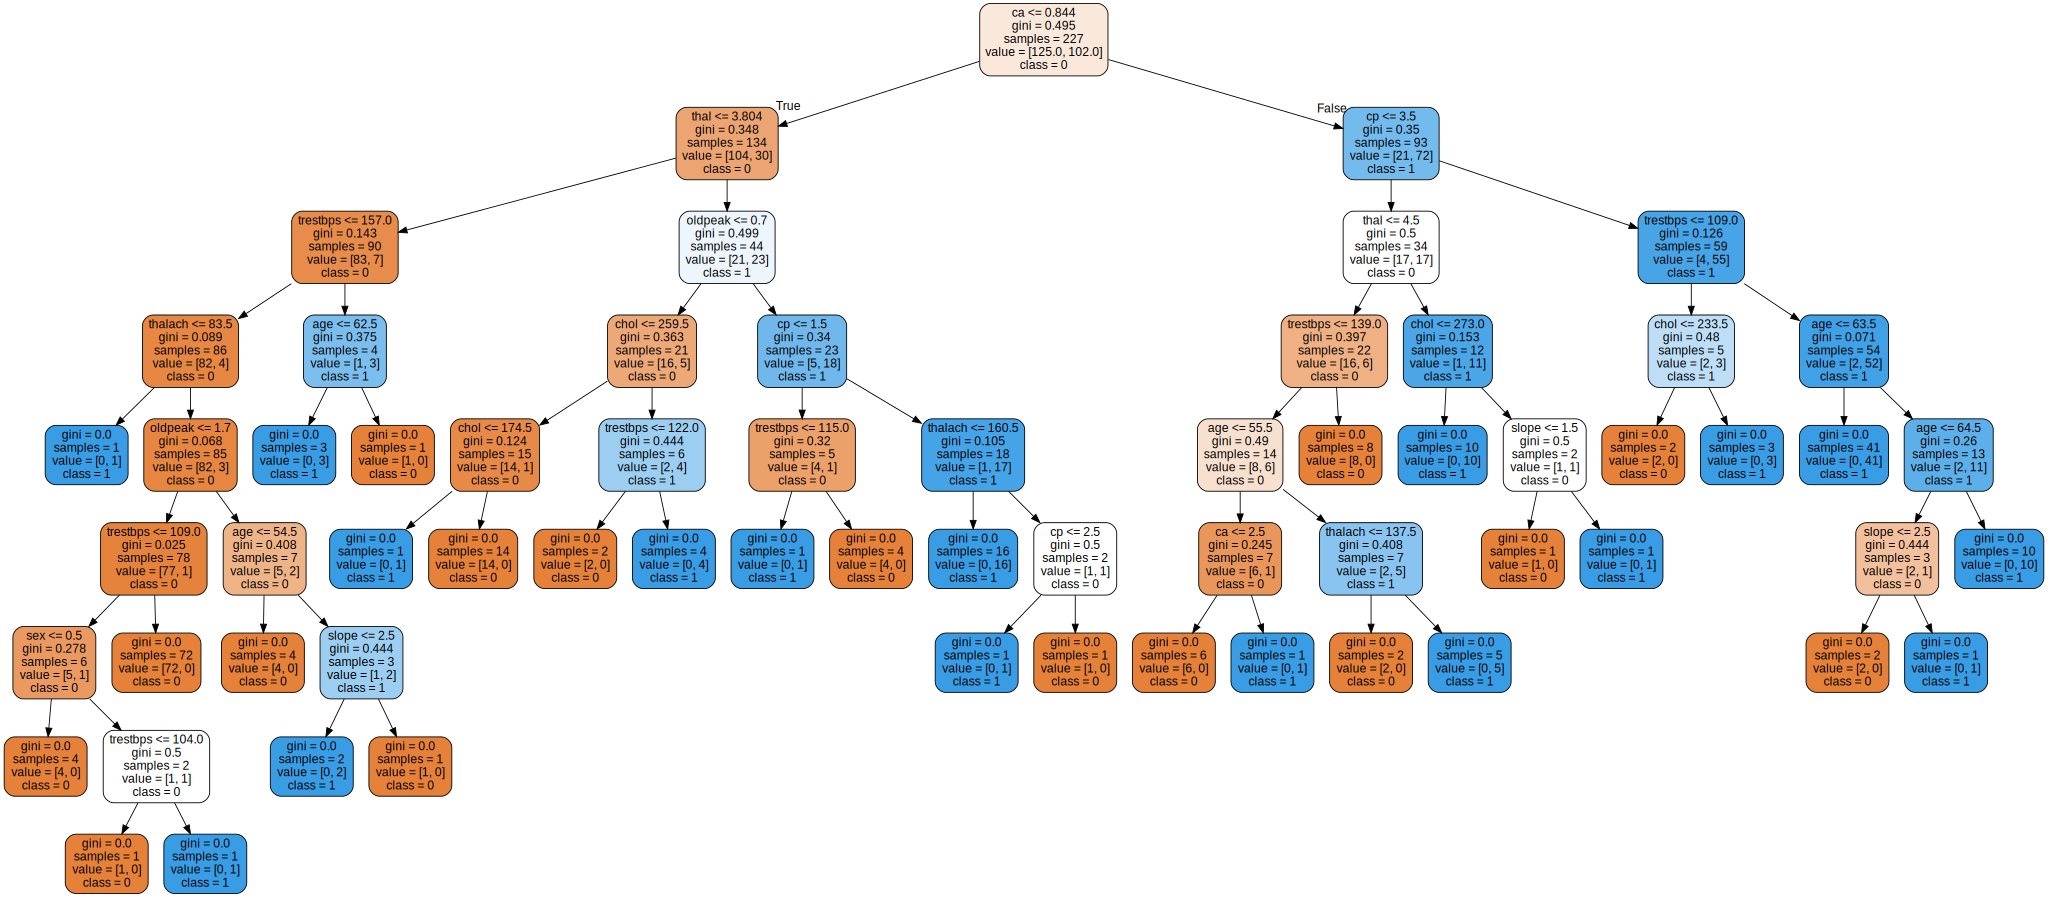

In [7]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

In [10]:
from sklearn.metrics import classification_report
y_pred = gridcv.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70        39
           1       0.69      0.65      0.67        37

    accuracy                           0.68        76
   macro avg       0.68      0.68      0.68        76
weighted avg       0.68      0.68      0.68        76



## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [14]:
clf = DecisionTreeClassifier()
bagged_tree = BaggingClassifier(clf, n_estimators=100,max_samples=X_train.shape[0], max_features=5)

bagged_tree.fit(X_train, y_train)

ypred_bt = bagged_tree.predict(X_test)
print(classification_report(y_test, ypred_bt))

              precision    recall  f1-score   support

           0       0.70      0.67      0.68        39
           1       0.67      0.70      0.68        37

    accuracy                           0.68        76
   macro avg       0.68      0.68      0.68        76
weighted avg       0.69      0.68      0.68        76



## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [16]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

ypred_rf = rf.predict(X_test)
print(classification_report(y_test, ypred_rf))

              precision    recall  f1-score   support

           0       0.77      0.85      0.80        39
           1       0.82      0.73      0.77        37

    accuracy                           0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.79      0.79      0.79        76



#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

In [20]:
pipe = Pipeline([('scaler', StandardScaler()), ('model', DecisionTreeClassifier())])

In [51]:
param_grid = [
    {'model': [DecisionTreeClassifier()],
     'model__max_depth': [5,10,None],
     'model__min_samples_split': [2,10],
     'model__criterion': ['gini', 'entropy']},

    {'model': [BaggingClassifier()],
     'model__n_estimators': [50,100,200],
     'model__max_samples': [0.5,1.0],
     'model__bootstrap' : [True, False]},


    {'model': [RandomForestClassifier()],
     'model__n_estimators': [100, 200, 500],
     'model__max_depth': [5,10,None],
     'model__criterion': ['gini', 'entropy']}
]

In [52]:
scoring = {
    'Accuracy': 'accuracy',
    'F1_Score': 'f1_weighted'
}

In [53]:
grid = GridSearchCV(pipe, param_grid, cv=5, scoring=scoring,refit='F1_Score', n_jobs=-1)

grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        RandomForestClassifier(min_samples_split=6,
                                                               n_estimators=200))]),
             n_jobs=-1,
             param_grid=[{'model': [DecisionTreeClassifier()],
                          'model__criterion': ['gini', 'entropy'],
                          'model__max_depth': [5, 10, None],
                          'model__min_samples_split': [2, 10]},
                         {'model': [BaggingClassifier()],
                          'model__bootstrap': [True, False],
                          'model__max_samples': [0.5, 1.0],
                          'model__n_estimators': [50, 100, 200]},
                         {'model': [RandomForestClassifier()],
                          'model__criterion': ['gini', 'entropy'],
                          'model__max_depth': [5, 10, None],
                          'model__n_estimators': [100, 200, 500]}],
             refit='F1_Score',
             scoring={'Accuracy': 'accuracy', 'F1_Score': 'f1_weighted'})

In [54]:
results_df = pd.DataFrame(grid.cv_results_)
results_df['model_name'] = results_df['param_model'].apply(lambda x: x.__class__.__name__)
results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__criterion,param_model__max_depth,param_model__min_samples_split,param_model__bootstrap,param_model__max_samples,...,rank_test_Accuracy,split0_test_F1_Score,split1_test_F1_Score,split2_test_F1_Score,split3_test_F1_Score,split4_test_F1_Score,mean_test_F1_Score,std_test_F1_Score,rank_test_F1_Score,model_name
0,0.019643,0.007824,0.024156,0.011309,DecisionTreeClassifier(),gini,5,2.0,NaN,NaN,...,32,0.731366,0.804626,0.800594,0.797552,0.778217,0.782471,0.027116,33,DecisionTreeClassifier
1,0.011458,0.003249,0.016861,0.001307,DecisionTreeClassifier(),gini,5,10.0,NaN,NaN,...,41,0.731366,0.739130,0.733333,0.842541,0.733333,0.755941,0.043378,42,DecisionTreeClassifier
2,0.012565,0.002226,0.021818,0.005182,DecisionTreeClassifier(),gini,10,2.0,NaN,NaN,...,42,0.781355,0.717794,0.732543,0.799397,0.756281,0.757474,0.030084,41,DecisionTreeClassifier
3,0.011971,0.002679,0.020165,0.006688,DecisionTreeClassifier(),gini,10,10.0,NaN,NaN,...,39,0.731366,0.739130,0.733333,0.842541,0.756042,0.760483,0.041938,39,DecisionTreeClassifier
4,0.014958,0.004116,0.020443,0.004257,DecisionTreeClassifier(),gini,None,2.0,NaN,NaN,...,34,0.802360,0.739625,0.800594,0.777778,0.777119,0.779495,0.022655,34,DecisionTreeClassifier


In [55]:
unique_models = results_df['model_name'].unique()
print('Compare each Models')

Compare each Models


In [56]:
for model_name in unique_models:
    best_params_for_Type = results_df[results_df['model_name'] == model_name].sort_values(by='mean_test_F1_Score', ascending=False).iloc[0]['params']
    pipe.set_params(**best_params_for_Type)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(f'Classification_Report: {model_name}')
    print(classification_report(y_test, y_pred))


Classification_Report: DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.68      0.67      0.68        39
           1       0.66      0.68      0.67        37

    accuracy                           0.67        76
   macro avg       0.67      0.67      0.67        76
weighted avg       0.67      0.67      0.67        76

Classification_Report: BaggingClassifier
              precision    recall  f1-score   support

           0       0.72      0.72      0.72        39
           1       0.70      0.70      0.70        37

    accuracy                           0.71        76
   macro avg       0.71      0.71      0.71        76
weighted avg       0.71      0.71      0.71        76

Classification_Report: RandomForestClassifier
              precision    recall  f1-score   support

           0       0.73      0.77      0.75        39
           1       0.74      0.70      0.72        37

    accuracy                           0.74      

In [57]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print(f'Classification_Report: {model_name}')

Classification_Report: RandomForestClassifier


What is your best model?
โมเดลที่ดีที่สุด คือ Random Forst ด้วยค่า f1-score และ accuracy ที่สูงกว่า อยู่ที่ 0.75 และ 0.74 ตามลำดับ


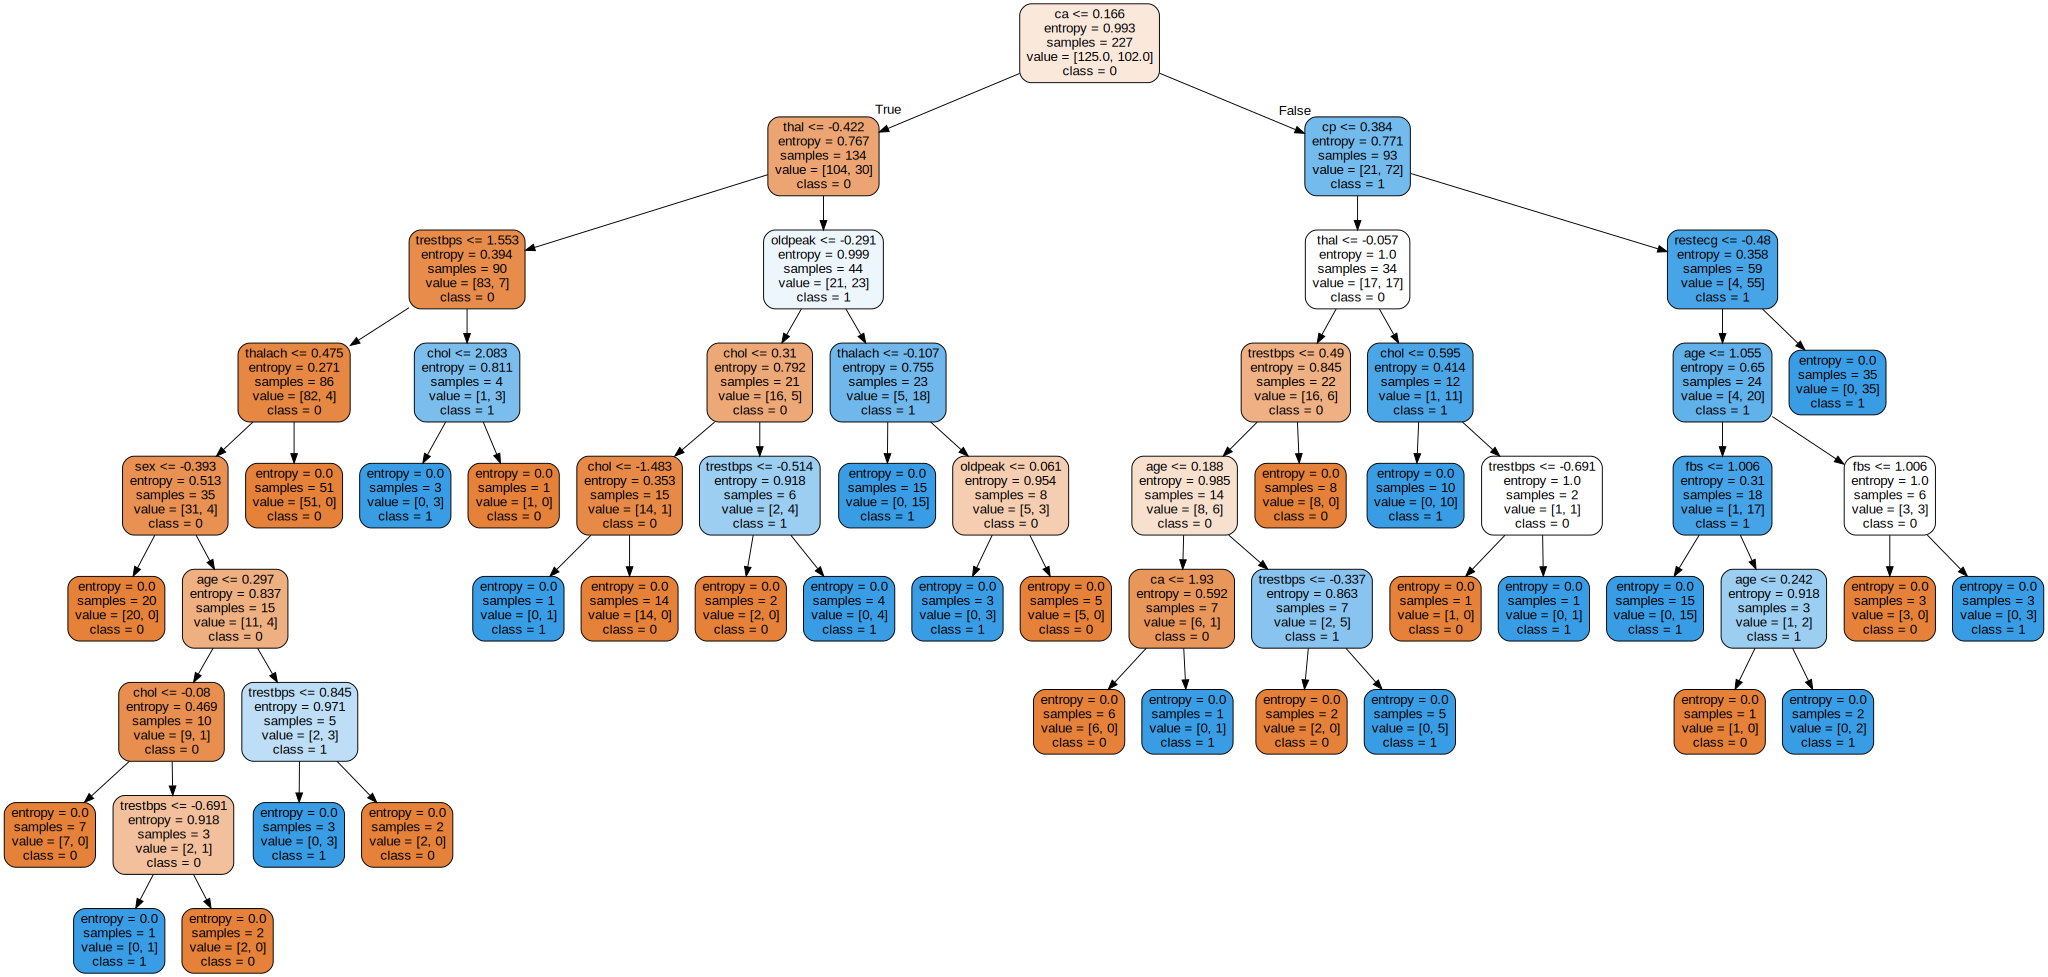

In [44]:

dt_results = results_df[results_df['model_name'] == 'DecisionTreeClassifier']
best_dt_row = dt_results.loc[dt_results['mean_test_F1_Score'].idxmax()]
best_dt_params_dict = best_dt_row['params']

temp_pipeline_for_dt_plot = Pipeline([('scaler', StandardScaler()), ('model', DecisionTreeClassifier())])
temp_pipeline_for_dt_plot.set_params(**best_dt_params_dict)
temp_pipeline_for_dt_plot.fit(X_train, y_train)

# Extract the trained DecisionTreeClassifier from this temporary pipeline
best_dt_for_plot = temp_pipeline_for_dt_plot.named_steps['model']

# Now, use export_graphviz with the actual DecisionTreeClassifier object
plot_data = export_graphviz(best_dt_for_plot,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

What hyperparameters did you choose?
criterion คือ เกณฑ์การตัดสินใจให้โมเดล
Max_dept คือ ความลึกของต้นไม้ในการเรียนรู้ของโมเดล
n_estimate คือ จำนวนต้นไม้ในการเทรน

What are the best values of your hyperparameters?
criterion='entropy', max_depth=10, n_estimators=200